In [1]:
print("Program Started\nInstantiating Drivers")

from pynq.overlays.base import BaseOverlay
import numpy as np
import cv2
# from pynq.lib.video import *
from pynq.lib.video import *
# print(dir(pynq.lib.video))
# Overlay("base.bit").download()
base = BaseOverlay("base.bit")

webcam = cv2.VideoCapture(0)
# monitor configuration: *720 @ 60Hz
hdmi_out = base.video.hdmi_out
hdmi_out.configure(VideoMode(640, 480, 24))
hdmi_out.start()
# help(hdmi_out)

# monitor (output) frame buffer size
frame_out_w = 1920
frame_out_h = 1080
# camera (input) configuration
frame_in_w = 640
frame_in_h = 480

# initialize camera from OpenCV
webcam.set(cv2.CAP_PROP_FRAME_WIDTH, frame_in_w);
webcam.set(cv2.CAP_PROP_FRAME_HEIGHT, frame_in_h);

print("Capture device is open: " + str(webcam.isOpened()))

Program Started
Instantiating Drivers


Capture device is open: True


In [2]:
count = 0
while not webcam.isOpened():
    count = 1
print("Capture device is open: " + str(webcam.isOpened()))

Capture device is open: True


## Webcam image Check

Capture device is open: True


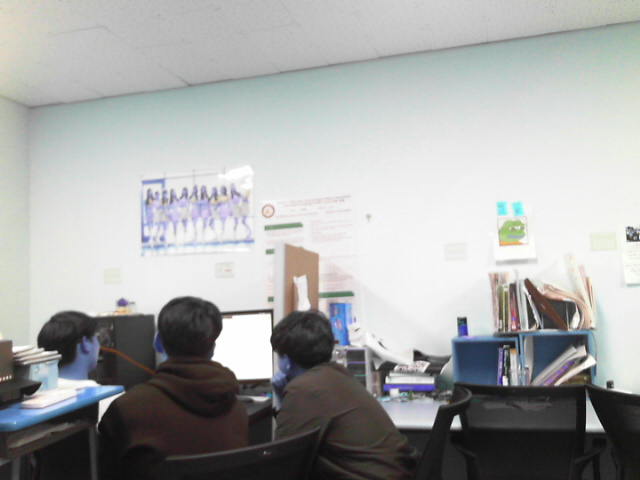

In [3]:
from PIL import Image as PIL_Image

print("Capture device is open: " + str(webcam.isOpened()))
if webcam.isOpened():
    ret, frame = webcam.read()
    pil_out = PIL_Image.fromarray(frame)
pil_out

### Check HDMI Monitor

In [4]:
if webcam.isOpened():
    ret, frame = webcam.read()
    outframe = hdmi_out.newframe()
    np.copyto(outframe, frame)
    hdmi_out.writeframe(outframe)
    pil_out = PIL_Image.fromarray(frame)
else:
    print("Capture device is open: " + str(webcam.isOpened()))
pil_out    

KeyboardInterrupt: 

## Face Detection with webcamera

In [75]:
from PIL import Image as PIL_Image

face_cascade = cv2.CascadeClassifier(
    '/home/xilinx/jupyter_notebooks/base/video/data/'
    'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(
    '/home/xilinx/jupyter_notebooks/base/video/data/'
    'haarcascade_eye.xml')

count = 0
print("Capture device is open: " + str(webcam.isOpened()))
while webcam.isOpened():
    ret, frame = webcam.read()
    if count%4 != 3:
        count = count + 1
        continue

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]

        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    
    outframe = hdmi_out.newframe()
    np.copyto(outframe, frame)
    hdmi_out.writeframe(outframe)
    count = 0

print("End Program")

Capture device is open: True


KeyboardInterrupt: 